In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error, \
mean_absolute_error,explained_variance_score
sns.set()

In [7]:
data = pd.read_csv("avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [8]:
print(data.shape)
print(data.isnull().sum())
print(data.dtypes)
print(data.columns)
print(data['type'].unique())

(1517, 14)
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object
Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')
['conventional']


In [9]:
data.drop(columns='Unnamed: 0',inplace=True)

In [10]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [11]:
data['Date']=pd.to_datetime(data['Date'])

In [12]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [13]:
data['Month']=[i.month for i in data['Date']]

In [14]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [15]:
data['4046']=data['4046'].astype('str')
data['4225']=data['4225'].astype('str')
data['4770']=data['4770'].astype('str')

In [16]:
data.describe()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558
std,0.188891,4.433143e+06,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146
min,0.490000,3.875074e+04,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000
25%,0.980000,1.474700e+05,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000
50%,1.080000,4.027919e+05,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000
75%,1.190000,9.819751e+05,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000
max,1.680000,4.465546e+07,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000


In [17]:
def cv(data):
    x=data.mean()
    y=data.std()
    coefficientofvariation=(round((y/x)*100,2))
    return coefficientofvariation

In [18]:
print('AveragePrice cv:%1.2f%%'%(cv(data['AveragePrice'])))
print('Total Volume cv:%1.2f%%'%(cv(data['Total Volume'])))
print('Total Bags cv:%1.2f%%'%(cv(data['Total Bags'])))
print('Small Bags cv:%1.2f%%'%(cv(data['Small Bags'])))
print('Large Bags cv:%1.2f%%'%(cv(data['Large Bags'])))
print('XLarge Bags cv:%1.2f%%'%(cv(data['XLarge Bags'])))

AveragePrice cv:17.57%
Total Volume cv:276.75%
Total Bags cv:258.17%
Small Bags cv:260.27%
Large Bags cv:277.23%
XLarge Bags cv:341.73%


In [19]:
x=['AveragePrice','Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']
print('skewness')
print('=============================')
print(data.skew())
print('=============================')
print('kurtosis')
print('=============================')
print(data.kurt())
print('=============================')
print('mode')
print('=============================')
print('average Price mode:',data['AveragePrice'].mode())
print('Total Volume mode:',data['Total Volume'].mode())
print('Total Bags mode:',data['Total Bags'].mode())
print('Small Bags mode:',data['Small Bags'].mode())
print('Large Bags mode:',data['Large Bags'].mode())
print('XLarge Bags mode:',data['XLarge Bags'].mode())

skewness
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Month           0.101439
dtype: float64
kurtosis
AveragePrice     0.545895
Total Volume    42.793896
4046            41.130928
4225            46.365603
4770            34.572214
Total Bags      32.674862
Small Bags      32.498990
Large Bags      30.330755
XLarge Bags     47.991606
year             1.344569
Month           -1.192055
dtype: float64
mode
average Price mode: 0    1.08
dtype: float64
Total Volume mode: 0          38750.74
1          40391.55
2          40507.36
3          40873.28
4          41143.51
           ...     
1512    36400886.58
1513    36549995.66
1514    37026085.75
1515    41291704.39
1516    44655461.51
Length: 1517, dtype: float64
Total Bags mode: 0          3311.77
1          4445.90
2          4789.54

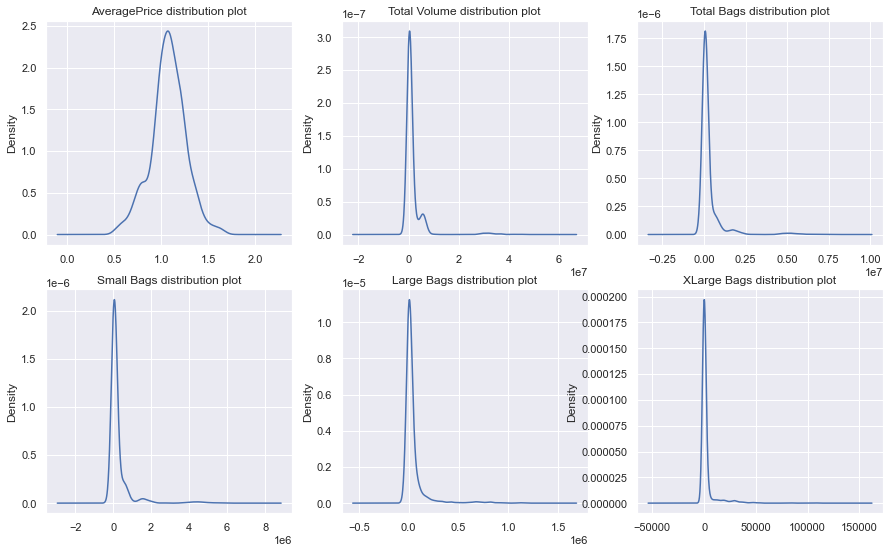

In [20]:
z0=plt.figure(figsize=(15,14))
for i in range(len(x)):
    z0.add_subplot(3,3,i+1)
    data[str(x[i])].plot(kind='kde',title='%s distribution plot'%x[i])
else:
    pass
plt.show()

In [21]:
bagGroup=data.groupby(by='year')
bagsum=bagGroup.sum()
bagSum=pd.DataFrame(bagsum.loc[:,'Total Bags'])
bagSum.iloc[0:3,0]

year
2015    3.346280e+08
2016    1.107592e+08
Name: Total Bags, dtype: float64

In [22]:
bagGroup=data.groupby(by='year')
bagsum=bagGroup.sum()
bagSum=pd.DataFrame(bagsum.loc[:,'Total Bags'])
bagSum.iloc[0:3,0]

year
2015    3.346280e+08
2016    1.107592e+08
Name: Total Bags, dtype: float64

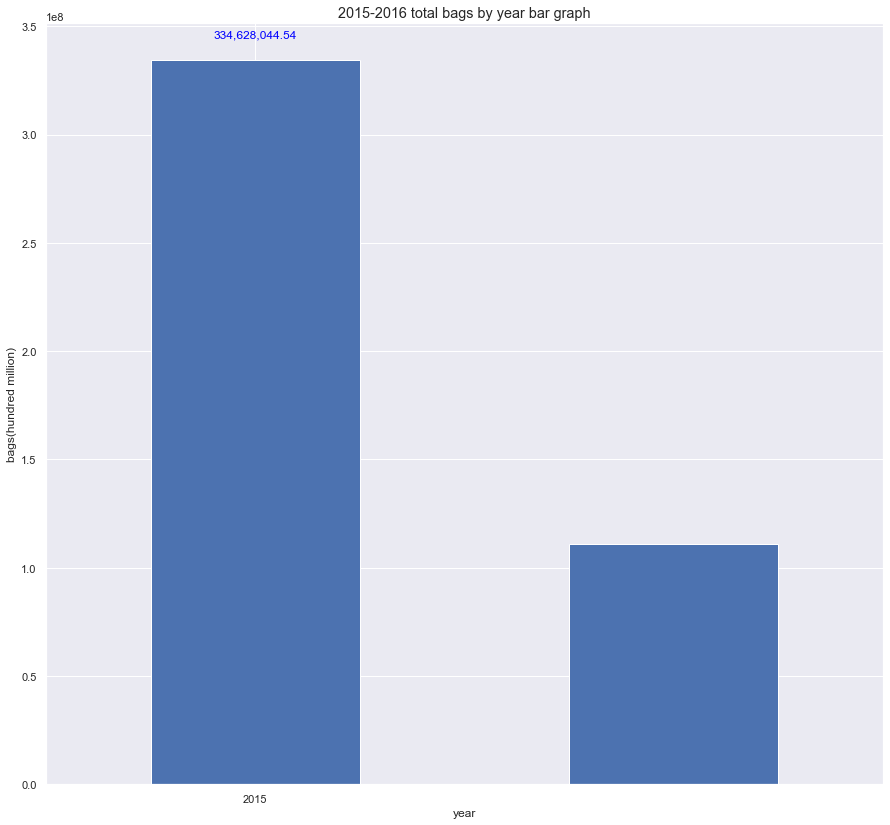

In [23]:
z1=bagSum.iloc[0:3].plot.bar(figsize=(15,14),legend=False)
z1.get_figure()
x=np.arange(bagsum.index.shape[0]-1)
y=np.array(bagSum.iloc[0:3,0])
plt.title('2015-2016 total bags by year bar graph',fontsize='large')
plt.ylabel('bags(hundred million)')
plt.xticks(x,bagSum.index[0:3],rotation=0)
for i,j in zip(x,y):
    plt.text(i,j+10000000,format(round(j,2),','),color='blue',ha='center')
else:
    pass
plt.show()

In [24]:
pricePivot=pd.pivot_table(data,index='year',columns='Month',values='AveragePrice',aggfunc=np.mean)
pricePivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,1.039580,1.114487,1.074603,1.069612,1.073944,1.015128,1.045362,1.070929,1.045316,1.059861,1.060762,1.054417
2016,1.009545,1.073182,1.036875,1.080952,1.047222,1.269412,1.240000,1.071176,1.264167,1.212692,1.371154,1.213125


In [25]:
DbagSum=bagsum.loc[:,['Small Bags','Large Bags','XLarge Bags']]
DbagSum

,Small Bags,Large Bags,XLarge Bags
year,,,
2015,2.773770e+08,55391693.84,1859398.48
2016,1.000126e+08,9296295.06,1450348.24


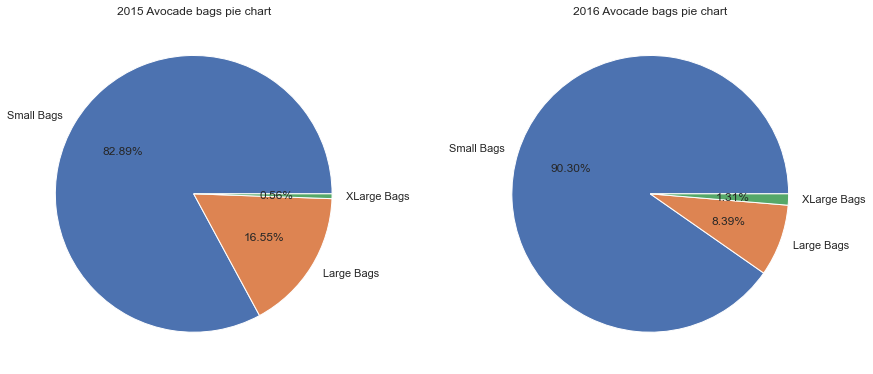

In [26]:
z3=plt.figure(figsize=(15,14))
labels=DbagSum.columns
explode=[0.0,0.0,0.0]
for i in range(DbagSum.index.shape[0]):
    z3.add_subplot(2,2,i+1)
    plt.title('%s Avocade bags pie chart'%DbagSum.index[i])
    plt.pie(DbagSum.iloc[i,:],labels=labels,explode=explode,autopct='%1.2f%%')
else:
    pass
plt.show()

In [27]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-06-12,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [28]:
data=data.loc[:,['AveragePrice','4046','4225','4770','type','region']]

In [29]:
data.head()

,AveragePrice,4046,4225,4770,type,region
0,1.33,1036.74,54454.85,48.16,conventional,Albany
1,1.35,674.28,44638.81,58.33,conventional,Albany
2,0.93,794.7,109149.67,130.5,conventional,Albany
3,1.08,1132.0,71976.41,72.58,conventional,Albany
4,1.28,941.48,43838.39,75.78,conventional,Albany


In [30]:
print(data['type'].unique())
print(data['region'].unique())

['conventional']
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'SanDiego' 'SanFrancisco'
 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis'
 'Syracuse' 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [31]:
for i in range(data.index.shape[0]):
    if data.loc[i,'type']=='conventional':
        data.loc[i,'type']=0
    else:
        data.loc[i,'type']=1

In [32]:
data.head()

,AveragePrice,4046,4225,4770,type,region
0,1.33,1036.74,54454.85,48.16,0,Albany
1,1.35,674.28,44638.81,58.33,0,Albany
2,0.93,794.7,109149.67,130.5,0,Albany
3,1.08,1132.0,71976.41,72.58,0,Albany
4,1.28,941.48,43838.39,75.78,0,Albany


In [33]:
data['region']=LabelEncoder().fit_transform(data['region'])

In [34]:
data.dtypes

AveragePrice    float64
4046             object
4225             object
4770             object
type             object
region            int32
dtype: object

In [35]:
data['4046']=data['4046'].astype('float')
data['4225']=data['4225'].astype('float')
data['4770']=data['4770'].astype('float')

In [36]:
pd.DataFrame(data.corr(method='pearson'))

,AveragePrice,4046,4225,4770,region
AveragePrice,1.000000,-0.190096,-0.092084,-0.100567,-0.229408
4046,-0.190096,1.000000,0.951952,0.898570,0.269481
4225,-0.092084,0.951952,1.000000,0.927757,0.215733
4770,-0.100567,0.898570,0.927757,1.000000,0.138092
region,-0.229408,0.269481,0.215733,0.138092,1.000000


In [37]:
Data=data.iloc[:,1:]
Target=data.loc[:,'AveragePrice']

In [38]:
pca=PCA(n_components=5).fit(Data)
pca.explained_variance_ratio_

array([9.76173211e-01, 2.34357616e-02, 3.91027206e-04, 3.42939543e-11,
       0.00000000e+00])

In [39]:
Pca=PCA(n_components=3).fit(Data)
pData=Pca.transform(Data)
pData

array([[-853946.19179514,   -5457.68796879,   -7435.21705556],
       [-860581.48507199,  -12672.04387575,   -6793.28719955],
       [-818686.43711074,   36215.93172329,  -10848.10724199],
       ...,
       [-819672.2365334 ,  -35405.6515174 ,    8812.76277102],
       [-813293.32185754,  -39876.06804561,    9438.51159755],
       [-821307.38725885,  -32315.3725972 ,    8593.20066664]])

In [40]:
data_train,data_test, \
target_train,target_test = \
train_test_split(pData,Target,train_size=0.6)

In [41]:
GBR=GradientBoostingRegressor(learning_rate=0.2).fit(data_train,target_train)
GBR

GradientBoostingRegressor(learning_rate=0.2)

In [42]:
pre=GBR.predict(data_train)
print('explained_variance_score:%1.2f'%(explained_variance_score(target_train,pre)))
print('r2_score:%1.2f'%r2_score(target_train,pre))
print('mean_absolute_error:%1.2f'%mean_absolute_error(target_train,pre))
print('mean_squared_error:%1.2f'%mean_squared_error(target_train,pre))

explained_variance_score:0.83
r2_score:0.83
mean_absolute_error:0.06
mean_squared_error:0.01


In [43]:
predict=GBR.predict(data_test)
print('explained_variance_score:%1.2f'%(explained_variance_score(target_test,predict)))
print('r2_score:%1.2f'%r2_score(target_test,predict))
print('mean_absolute_error:%1.2f'%mean_absolute_error(target_test,predict))
print('mean_squared_error:%1.2f'%mean_squared_error(target_test,predict))

explained_variance_score:0.57
r2_score:0.57
mean_absolute_error:0.09
mean_squared_error:0.02


In [44]:
data.head()

,AveragePrice,4046,4225,4770,type,region
0,1.33,1036.74,54454.85,48.16,0,0
1,1.35,674.28,44638.81,58.33,0,0
2,0.93,794.70,109149.67,130.50,0,0
3,1.08,1132.00,71976.41,72.58,0,0
4,1.28,941.48,43838.39,75.78,0,0


In [45]:
dataTrain,dataTest, \
targetTrain,targetTest = \
train_test_split(pData,Target,train_size=0.6)

In [46]:
FGBR=GradientBoostingRegressor(learning_rate=0.3).fit(dataTrain,targetTrain)


In [47]:
Fpre=FGBR.predict(dataTrain)
print('explained_variance_score:%1.2f'%(explained_variance_score(targetTrain,Fpre)))
print('r2_score:%1.2f'%r2_score(targetTrain,Fpre))
print('mean_absolute_error:%1.2f'%mean_absolute_error(targetTrain,Fpre))
print('mean_squared_error:%1.2f'%mean_squared_error(targetTrain,Fpre))

explained_variance_score:0.88
r2_score:0.88
mean_absolute_error:0.05
mean_squared_error:0.00


In [48]:
Fpredict=FGBR.predict(dataTest)
print('explained_variance_score:%1.2f'%(explained_variance_score(targetTest,Fpredict)))
print('r2_score:%1.2f'%r2_score(targetTest,Fpredict))
print('mean_absolute_error:%1.2f'%mean_absolute_error(targetTest,Fpredict))
print('mean_squared_error:%1.2f'%mean_squared_error(targetTest,Fpredict))

explained_variance_score:0.53
r2_score:0.52
mean_absolute_error:0.10
mean_squared_error:0.02


Summary
With using PCA and feature selection,

finding that using feature selection has higher r2_score

using feature selection is better than PCA data
With using feature selection GradientBoostingRegressor is best model as higher R2 score and less error r2_score:0.57,mean_absolute_error:0.09, mean_squared_error:0.02

In [55]:
import joblib as jb
jb.dump(GBR,'data.pkl')

['data.pkl']